# PCA for Interest Rate Modeling
Interest rates strongly influence financial markets. Therefore, it is critical for investors to understand the behaviour of these interest rate. Many different interest rates exist that differ based on the issuer and maturity. In this case, we will use PCA to interpret the behaviour of interest rates based on only a couple of metrics.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

### Load the data and Exploratory Analysis

Load the dataframe *interest_rates.csv* and set the column T as the index. Plot the first 5 observations of the dataframe:

In [2]:
rates = pd.read_csv('data/interest_rates.csv')
rates.set_index('T', inplace=True)
rates.head()

,1Y,2Y,3Y,4Y,5Y,7Y,10Y,30Y
T,,,,,,,,
2001-01-02,4.692,4.5650,4.6550,4.7550,4.870,5.102,5.345,5.742
2001-01-03,4.619,4.5715,4.6550,4.7600,4.870,5.089,5.306,5.716
2001-01-04,4.526,4.5350,4.6650,4.7725,4.885,5.103,5.324,5.734
2001-01-05,4.458,4.4588,4.5888,4.7138,4.830,5.046,5.278,5.703
2001-01-08,4.451,4.4738,4.5850,4.7050,4.830,5.050,5.264,5.694


Get some summary statistics about the interest rates at different maturities:

In [3]:
rates.describe()

,1Y,2Y,3Y,4Y,5Y,7Y,10Y,30Y
count,3619.000000,3619.000000,3619.000000,3619.000000,3619.000000,3619.000000,3619.000000,3619.000000
mean,2.428504,2.484221,2.660542,2.830884,2.989169,3.261817,3.558102,3.960179
std,1.405298,1.427133,1.402469,1.369694,1.332905,1.269341,1.195567,1.135832
min,0.250000,0.107000,0.146000,0.202000,0.274000,0.440000,0.672000,1.137000
25%,1.275000,1.400150,1.567500,1.798750,2.013250,2.336550,2.652900,2.883150
50%,2.241000,2.509000,2.746200,2.957000,3.142000,3.390000,3.688000,4.051200
75%,3.572000,3.790500,3.877650,3.948850,4.043850,4.209800,4.442500,4.872500
max,5.526000,5.523500,5.406500,5.281500,5.203000,5.322000,5.557500,6.047500


Create a time series plot of all columns:

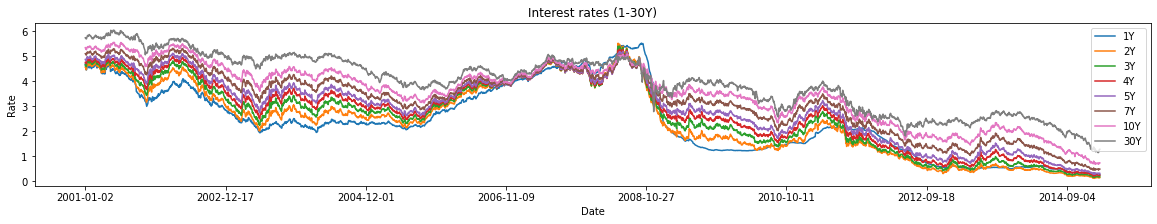

In [4]:
plt.rcParams["figure.figsize"] = (20,3)
rates.plot()
plt.title('Interest rates (1-30Y)');
plt.xlabel('Date')
plt.ylabel('Rate');

### Fit a PCA model to the data

In [5]:
pca = PCA(n_components=rates.shape[1])
pca.fit(rates.values)

PCA(n_components=8)

### Determine how many components to keep
To determine how many components to keep, a scree plot is often used. This scree plot shows the proportion of the variance explained for each number of components included. A simple way of visualizing the scree plot is to plot the rescaled eigenvalues. In sklearn, the explained variance ratio is given by the *explained_variance_ratio_* property.

In [6]:
x = np.arange(rates.shape[1]) + 1
explained_variance = pca.explained_variance_ratio_

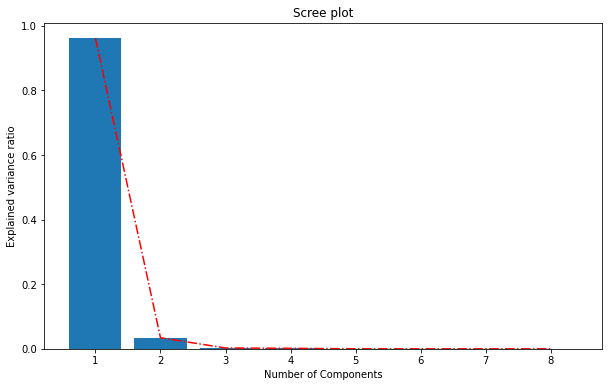

In [7]:
plt.rcParams["figure.figsize"] = (10,6)
plt.bar(x, explained_variance);
plt.plot(x, explained_variance, color='red', linestyle='-.')
plt.xlabel('Number of Components')
plt.ylabel('Explained variance ratio')
plt.title('Scree plot');

The decisions is made to keep n principal components. Now refit the pca model using only the specified number of components:

In [8]:
pca = PCA(n_components=2)
pca.fit(rates.values)

PCA(n_components=2)

### Interpret the principals
The interpretation of the principals is done based on the loadings. These loadings correspond to the eigenvectors of the covariance matrix. In Sklearn, these loadings can be obtained using the *components_* attribute:

In [9]:
loadings = pca.components_

Plot the loadings for each principal component in a horizontal bar chart:

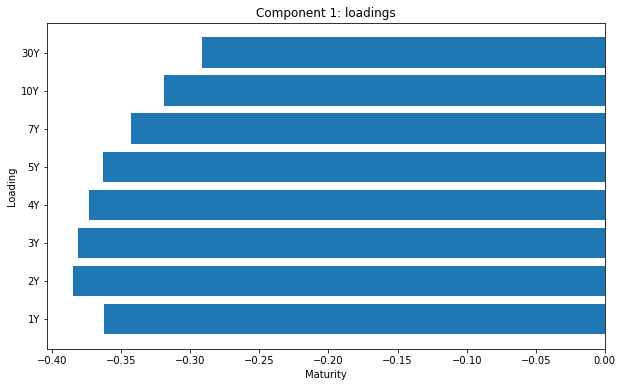

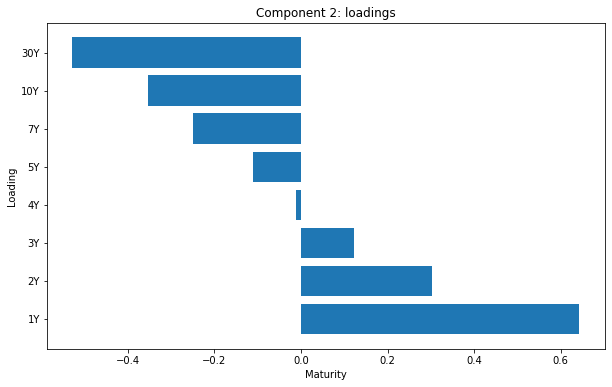

In [10]:
for i, loading in enumerate(loadings):
    plt.figure(i)
    plt.barh(rates.columns, loading);
    plt.title('Component {}: loadings'.format(i+1));
    plt.xlabel('Maturity')
    plt.ylabel('Loading');

Interpretation:
- Component 1: a shift in interest rates, all interest rates move in the same direction. An increase in the first component means a decrease of the overall interest rate.
- Component 2: a steepening/flattening of the interest rate curves. An increase in the second component means that short-term interest rates increase and long-term interest rates decrease, i.e., there is a flattening of the interest rate curve.

### Plot a time series of the components

In [11]:
transformed_variables = pca.transform(rates.values)
rates.loc[:, ['Shift', 'Flattening']] = transformed_variables
rates.shift = rates.Shift.apply(lambda x: -x)
rates.head()

,1Y,2Y,3Y,4Y,5Y,7Y,10Y,30Y,Shift,Flattening
T,,,,,,,,,,
2001-01-02,4.692,4.5650,4.6550,4.7550,4.870,5.102,5.345,5.742,-5.502209,0.070088
2001-01-03,4.619,4.5715,4.6550,4.7600,4.870,5.089,5.306,5.716,-5.455659,0.055848
2001-01-04,4.526,4.5350,4.6650,4.7725,4.885,5.103,5.324,5.734,-5.437639,-0.034976
2001-01-05,4.458,4.4588,4.5888,4.7138,4.830,5.046,5.278,5.703,-5.269503,-0.057590
2001-01-08,4.451,4.4738,4.5850,4.7050,4.830,5.050,5.264,5.694,-5.262285,-0.049205


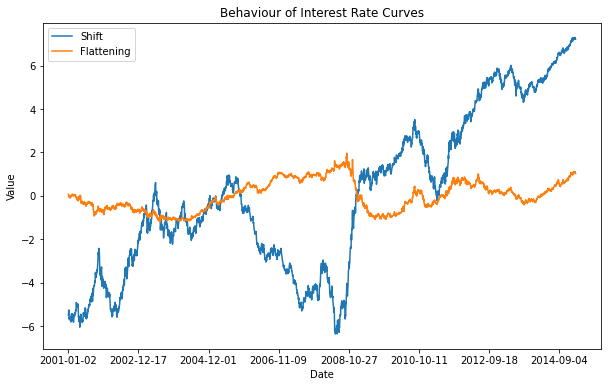

In [12]:
rates[['Shift', 'Flattening']].plot()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Behaviour of Interest Rate Curves');